In [ ]:
!pip install ultralytics


  Using cached ultralytics-8.3.173-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.


0: 576x640 1 bird, 231.9ms
Speed: 19.2ms preprocess, 231.9ms inference, 5.3ms postprocess per image at shape (1, 3, 576, 640)


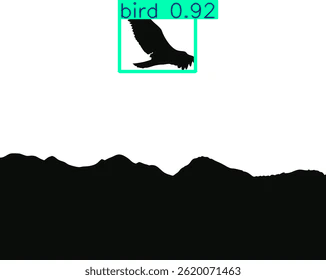

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

model = YOLO("yolov8n.pt")
image_path = "Bird.webp"
image = cv2.imread(image_path)
results = model(image)
annotated_image = results[0].plot()
cv2_imshow(annotated_image)


0: 480x640 7 birds, 5 kites, 4996.7ms
Speed: 5.4ms preprocess, 4996.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


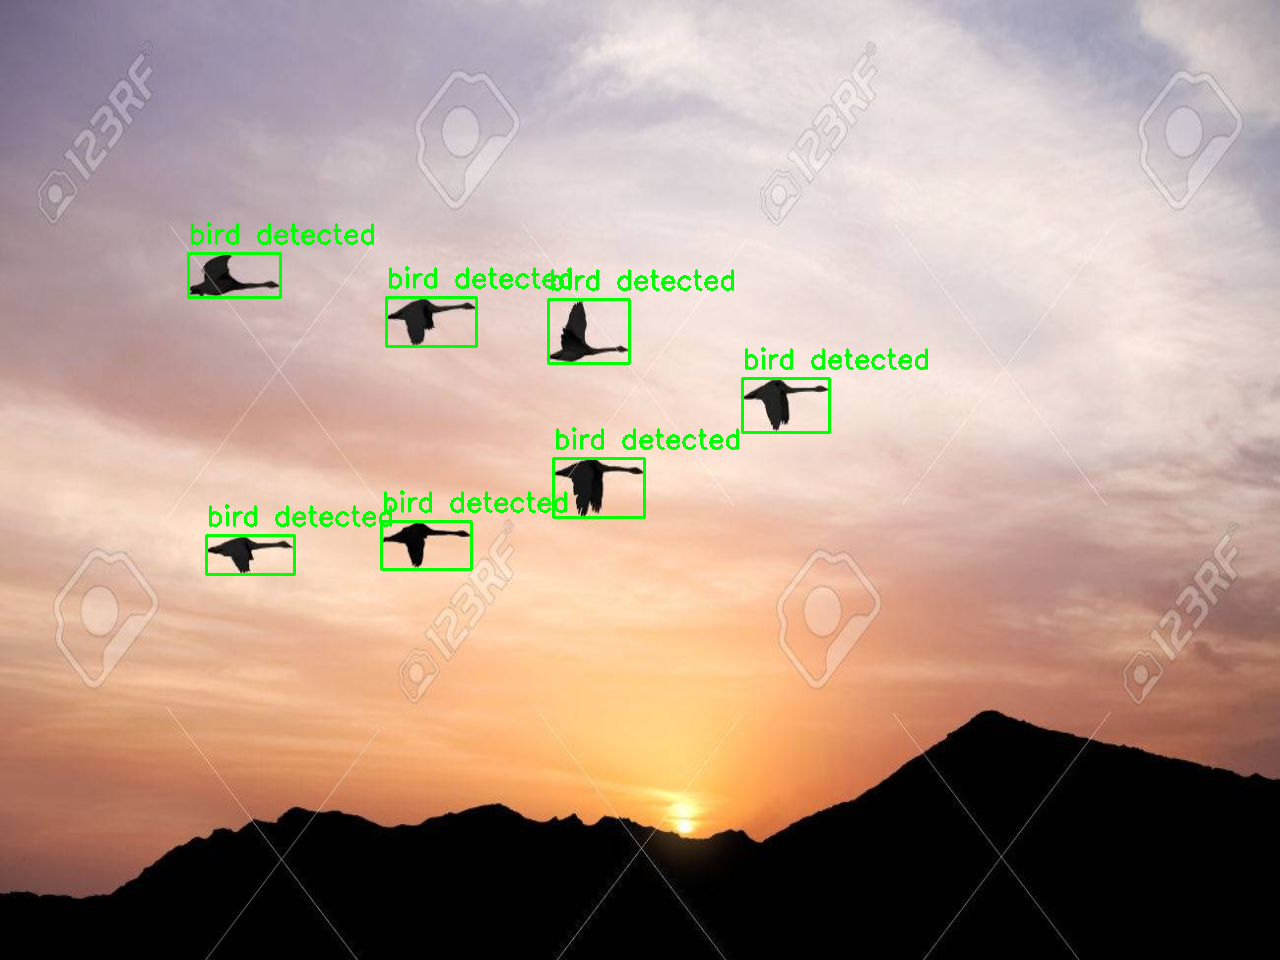

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

model = YOLO("yolov8x.pt")
image_path = "hill_birds.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (1280, 960))
results = model(image)
boxes = results[0].boxes
class_ids = boxes.cls.cpu().numpy().astype(int)
bird_class_id = 14
annotated_image = image.copy()
for i, class_id in enumerate(class_ids):
    if class_id == bird_class_id:
        x1, y1, x2, y2 = boxes.xyxy[i].cpu().numpy().astype(int)
        cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(annotated_image, "bird detected", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
cv2_imshow(annotated_image)
cv2.imwrite("birds_detected.jpg", annotated_image)